In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from solution import LeagueSolution
from evolution import genetic_algorithm
from operators import (
    mutate_swap,
    mutate_team_shift,
    mutate_shuffle_team,
    crossover_one_point,
    crossover_uniform,
    selection_tournament,
    selection_ranking
)

In [57]:
#loading csv and turning it to a line dictionary

players = pd.read_csv("sports players.csv", sep=";").to_dict(orient="records")
players

[{'Name': 'Alex Carter', 'Position': 'GK', 'Skill': 85, 'Salary': 90},
 {'Name': 'Jordan Smith', 'Position': 'GK', 'Skill': 88, 'Salary': 100},
 {'Name': 'Ryan Mitchell', 'Position': 'GK', 'Skill': 83, 'Salary': 85},
 {'Name': 'Chris Thompson', 'Position': 'GK', 'Skill': 80, 'Salary': 80},
 {'Name': 'Blake Henderson', 'Position': 'GK', 'Skill': 87, 'Salary': 95},
 {'Name': 'Daniel Foster', 'Position': 'DEF', 'Skill': 90, 'Salary': 110},
 {'Name': 'Lucas Bennett', 'Position': 'DEF', 'Skill': 85, 'Salary': 90},
 {'Name': 'Owen Parker', 'Position': 'DEF', 'Skill': 88, 'Salary': 100},
 {'Name': 'Ethan Howard', 'Position': 'DEF', 'Skill': 80, 'Salary': 70},
 {'Name': 'Mason Reed', 'Position': 'DEF', 'Skill': 82, 'Salary': 75},
 {'Name': 'Logan Brooks', 'Position': 'DEF', 'Skill': 86, 'Salary': 95},
 {'Name': 'Caleb Fisher', 'Position': 'DEF', 'Skill': 84, 'Salary': 85},
 {'Name': 'Nathan Wright', 'Position': 'MID', 'Skill': 92, 'Salary': 120},
 {'Name': 'Connor Hayes', 'Position': 'MID', 'S

In [58]:
# Test configurations (3 mutations, 2 crossovers, 2 selections)
configs = [
    (mutate_swap, crossover_one_point, selection_tournament),
    (mutate_team_shift, crossover_uniform, selection_ranking),
    (mutate_shuffle_team, crossover_uniform, selection_tournament),
    (mutate_swap, crossover_uniform, selection_ranking)
]

results = []
best_solutions = []

In [59]:
#Running GA for each combination config
for i, (m_op, c_op, s_op) in enumerate(configs):
    start = time.time()
    print(f"Config {i+1} running ...")
    best, history = genetic_algorithm(
        players=players,
        mutation_operator=m_op,
        crossover_operator=c_op,
        selection_operator=s_op,
        generations=30
        #generations=10
    )
    results.append((f"Config {i+1}", history))
    best_solutions.append((f"Config {i+1}", best, best.fitness(players)))
    print("-------------- Processing time: ", time.time() - start)

Config 1 running ...
-------------- Processing time:  44.5099139213562
Config 2 running ...
-------------- Processing time:  236.03604292869568
Config 3 running ...
-------------- Processing time:  70.84637117385864
Config 4 running ...
-------------- Processing time:  166.61980438232422


The standard deviation is related to optimization ability because it quantifies the dispersion or variability of a data set in relation to its mean. In optimization contexts, understanding variability can be crucial to identify the efficiency and accuracy of a process or model.

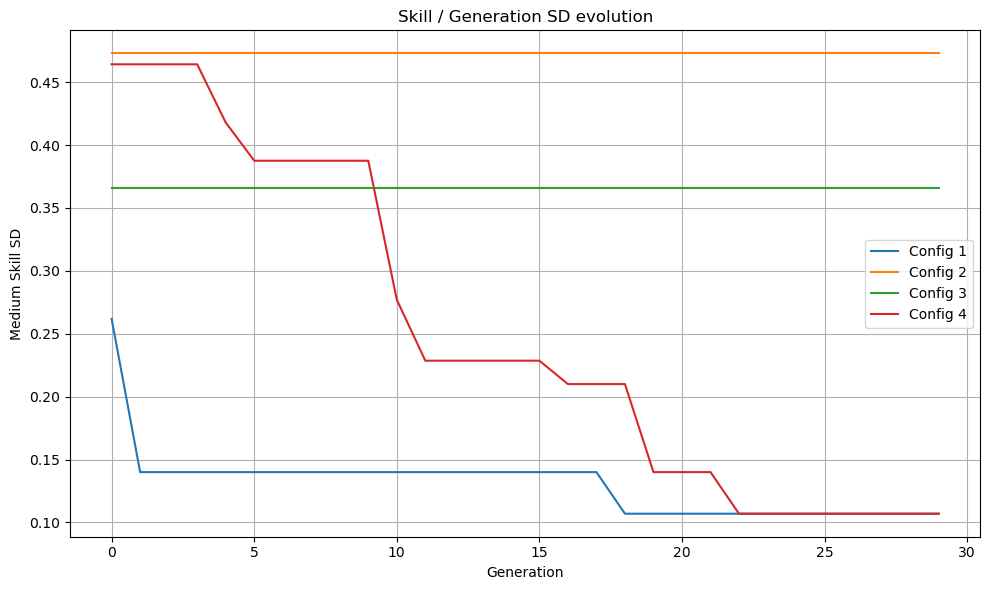

In [61]:
# Fitness evolution plot
plt.figure(figsize=(10, 6))
for label, hist in results:
    plt.plot(hist, label=label)
plt.title("Skill / Generation SD evolution")
plt.xlabel("Generation")
plt.ylabel("Medium Skill SD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

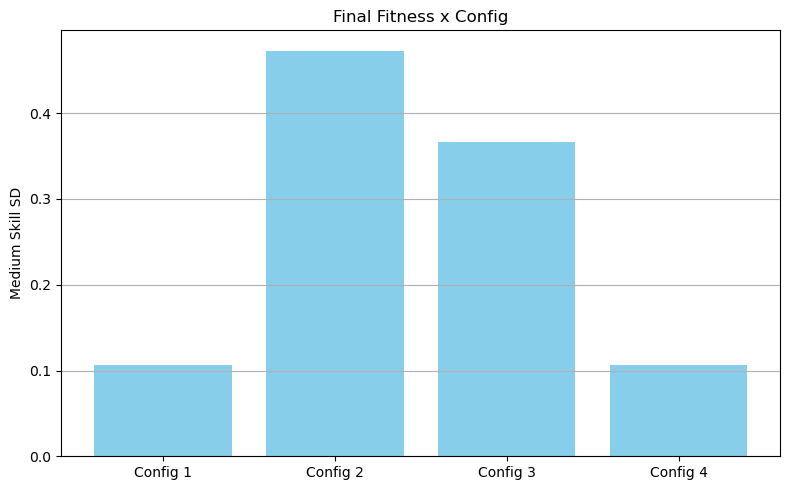

In [62]:
# Fitness configuration
labels = [label for label, _, _ in best_solutions]
fitness_values = [fit for _, _, fit in best_solutions]

plt.figure(figsize=(8, 5))
plt.bar(labels, fitness_values, color='skyblue')
plt.title("Final Fitness x Config")
plt.ylabel("Medium Skill SD")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [63]:
# Exibir composição de times da melhor solução encontrada
better = min(best_solutions, key=lambda x: x[2])
print(f"Best Config: {better[0]} | Fitness: {better[2]:.4f}")
teams = [[] for _ in range(5)]
for idx, team_id in enumerate(better[1].assignment):
    player = players[idx]
    teams[team_id].append((player["Name"], player["Position"], player["Skill"], player["Salary"]))

for i, team in enumerate(teams):
    print(f"\nTime {i+1}:")
    for p in team:
        print(f"  {p[0]:20s} | {p[1]:3s} | Skill: {p[2]} | Salary: €{p[3]}M")

Best Config: Config 1 | Fitness: 0.1069

Time 1:
  Blake Henderson      | GK  | Skill: 87 | Salary: €95M
  Daniel Foster        | DEF | Skill: 90 | Salary: €110M
  Dylan Morgan         | MID | Skill: 91 | Salary: €115M
  Hunter Cooper        | MID | Skill: 83 | Salary: €85M
  Tyler Jenkins        | FWD | Skill: 80 | Salary: €70M
  Brayden Hughes       | DEF | Skill: 87 | Salary: €100M
  Zachary Nelson       | FWD | Skill: 86 | Salary: €92M

Time 2:
  Chris Thompson       | GK  | Skill: 80 | Salary: €80M
  Owen Parker          | DEF | Skill: 88 | Salary: €100M
  Caleb Fisher         | DEF | Skill: 84 | Salary: €85M
  Austin Torres        | MID | Skill: 82 | Salary: €80M
  Sebastian Perry      | FWD | Skill: 95 | Salary: €150M
  Xavier Bryant        | FWD | Skill: 90 | Salary: €120M
  Dominic Bell         | MID | Skill: 86 | Salary: €95M

Time 3:
  Alex Carter          | GK  | Skill: 85 | Salary: €90M
  Nathan Wright        | MID | Skill: 92 | Salary: €120M
  Spencer Ward         | MID |